In [42]:
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns 

data = pd.read_csv('data/beer_consumption.csv', sep = ';')

# <font color = 'red' style = 'font-size: 30px;'> Estimating a Linear Regression Model for Consumption </font>
<hr style = 'border: 2px solid red;'>

# Linear Regression
<hr>

<p style = 'font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify; '> The regression analysis concerns the study of the dependence of a variable (the <b> dependent </b> variable) in relation to one or more variables, the explanatory variables, in order to estimate and / or predict the average value of the former in terms of the known or fixed values of the latter. </p>


## scikit-learn (https://scikit-learn.org/stable/)

<p style = 'font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify; '> * scikit-learn * is a Python module specialized in solutions for * machine learning *. </p>

## Importing * train_test_split * from the * scikit-learn * library

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [43]:
from sklearn.model_selection import train_test_split

## Creating a Series (pandas) to store Beer Consumption (y)

In [44]:
y = data['consumption']

## Creating a DataFrame (pandas) to store the explanatory variables (X)

In [45]:
X = data[['max_temp', 'rain', 'weekend']]

## Creating the training and test datasets

## Checking the file sizes generated by the * train_test_split * function

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 2811)

In [47]:
X_train.shape

(255, 3)

In [48]:
X_test.shape

(110, 3)

<img width='600px' src='data/img/reg_01.jpg'>

## Importing * LinearRegression * and * metrics * from the library * scikit-learn *

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

https://scikit-learn.org/stable/modules/classes.html#regression-metrics

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Instantiating the class * LinearRegression () *

In [50]:
model = LinearRegression()

## Using the * fit () * method of the "model" object to estimate our linear model using the TRAINING data (y_train and X_train)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit

In [51]:
model.fit(X_train, y_train)

LinearRegression()

## Obtaining the coefficient of determination (R²) of the estimated model with the TRAINING data

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score

### Coefficient of Determination - R²

The coefficient of determination (R²) is a summary measure that tells how much the regression line fits the data. It is a value between 0 and 1.

$$R^2(y, \hat{y}) = 1 - \frac {\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}{\sum_{i=0}^{n-1}(y_i-\bar{y}_i)^2}$$

In [52]:
print('R^2 = {}'.format(model.score(X_train, y_train).round(2)))

R^2 = 0.73


## Generating forecasts for TEST data (X_test) using the * predict () * method of the "model" object

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict

In [53]:
y_predicted = model.predict(X_test)

## Obtaining the coefficient of determination (R²) for the predictions of our model

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score

In [54]:
print('R^2 = %s' % metrics.r2_score(y_test, y_predicted).round(2))

R^2 = 0.69


# <font color = 'red' style = 'font-size: 30px;'> Getting Spot Predictions </font>
<hr style = 'border: 2px solid red;'>

## Input data

In [55]:
input = X_test[0:1]
input

,max_temp,rain,weekend
5,30.5,12.2,0


## Generating punctual forecast

In [56]:
model.predict(input)

array([26094.90177526])

## Creating a simple simulator

In [57]:
max_temp = 40
rain=0
weekend=1
input=[[max_temp, rain, weekend]]

print('{0:.2f} litters'.format(model.predict(input)[0]))

38742.53 litters


# <font color = 'red' style = 'font-size: 30px;'> Interpretation of Estimated Coefficients </font>
<hr style = 'border: 2px solid red;'>

<img width='600px' src='data/img/reg_02.jpg'>

## Obtaining the model intercept

<p style = 'font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify; '> The <b> intercept </b> represents the average effect in $ Y $ (Beer Consumption) with all explanatory variables excluded from the model. More simply, the <b> intercept </b> represents the average effect in $ Y $ (Beer Consumption) when $ X_2 $ (Maximum Temperature), $ X_3 $ (Rain) and $ X_4 $ (Weekend ) are equal to zero. </p>

In [58]:
model.intercept_

5951.9763393124595

In [59]:
type(model.intercept_)

numpy.float64

## Obtaining the regression coefficients

<p style = 'font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify; '> The <b> regression coefficients </b> $\beta_2$, $\beta_3 $ and $\beta_4$ are known as <b> partial regression coefficients </b> or <b > partial angular coefficients </b>. Considering the number of explanatory variables in our model, its meaning would be as follows: $\beta_2$ measures the variation in the average value of $Y$ (Beer Consumption), per unit variation in $ X_2 $ (Maximum Temperature), maintaining the values of $X_3$ (Rain) and $X_4$ (Weekend) are shown. In other words, it gives us the "direct" or "net" effect of a unit of variation in $X_2$ on the average value of $Y$, excluding the effects that $X_3$ and $X_4$ may have on the average of $Y$. Similarly, we can interpret the other regression coefficients. </p>

In [60]:
model.coef_

array([ 684.73675898,  -60.7824355 , 5401.08333866])

In [61]:
type(model.coef_)

numpy.ndarray

## Confirming the order of the explanatory variables in the DataFrame

In [62]:
X.columns

Index(['max_temp', 'rain', 'weekend'], dtype='object')

## Creating a list with the names of the model variables

In [63]:
index = ['Interceptor', 'Max temperature', 'Rain(mm)', 'Weekend']

## Creating a DataFrame to store model coefficients

https://docs.scipy.org/doc/numpy/reference/generated/numpy.append.html?#numpy.append

In [64]:
pd.DataFrame(data=np.append(model.intercept_, model.coef_), index=index, columns=['Parameter'])

,Parameter
Interceptor,5951.976339
Max temperature,684.736759
Rain(mm),-60.782435
Weekend,5401.083339


## Interpretation of Estimated Coefficients

<p style = 'font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify; '>
<b> Intercept </b> → Excluding the effect of the explanatory variables ($X_2 = X_3 = X_4 = 0$) the average effect on Beer Consumption would be <b> 5951.98 liters </b>.
</p>

<p style = 'font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify; '>
<b> Maximum Temperature (° C) </b> → Keeping the values ​​of $X_3$ (Rain) and $ X_4 $ (Weekend) constant, the increase of 1 ° C in the Maximum Temperature generates an average variation in the Beer Consumption of <b> 684.74 liters </b>.
</p>

<p style = 'font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify; '>
<b> Rain (mm) </b> → Keeping the values ​​of $X_2$ (Maximum Temperature) and $X_4$ (Weekend) constant, the addition of 1mm of Rain generates an average variation in Beer Consumption <b> -60.78 liters </b>.
</p>

<p style = 'font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify; '>
<b> Weekend (Yes / No) </b> → Keeping the values ​​of $X_2$ (Maximum Temperature) and $X_3$ (Rain) constant, the fact that the day is classified as a Weekend generates an average variation in Beer Consumption of <b> 5401.08 liters </b>.
</p>

# <font color = 'red' style = 'font-size: 30px;'> Graphical Analysis of Model Predictions </font>
<hr style = 'border: 2px solid red;'>

## Generating model predictions for TRAINING data

In [65]:
y_predicted_train = model.predict(X_train)

## Scatter plot between estimated value and actual value

https://seaborn.pydata.org/generated/seaborn.scatterplot.html

<AxesSubplot:title={'center':'Prediction VS Reality'}, xlabel='Beer consumption (liters) - Prevision', ylabel='Beer consumption (liters) - Reality'>

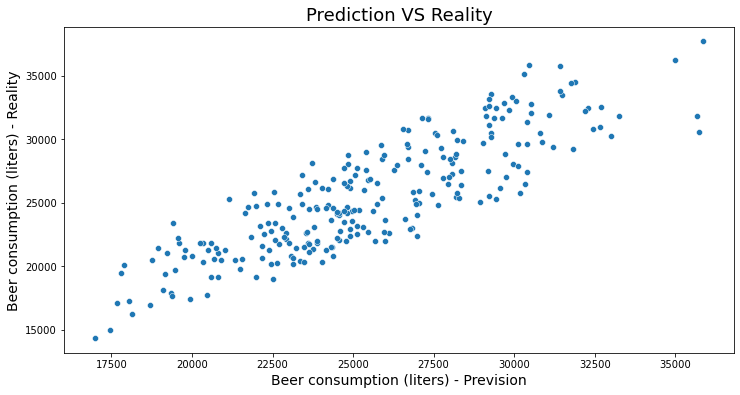

In [66]:
ax = sns.scatterplot(x = y_predicted_train, y=y_train)
ax.figure.set_size_inches(12,6)
ax.set_title('Prediction VS Reality', fontsize=18)
ax.set_xlabel('Beer consumption (liters) - Prevision', fontsize=14)
ax.set_ylabel('Beer consumption (liters) - Reality', fontsize=14)
ax

## Getting the residual

In [67]:
residual = y_train - y_predicted_train
residual

195    3891.289113
344    4040.499863
288   -3010.078635
59    -1704.289133
220    4223.837237
          ...     
73     3186.229912
68     -739.805532
215    3010.236465
341    2588.394409
84     1631.868243
Name: consumption, Length: 255, dtype: float64

## Dispersion graph between estimated value and residual

Informal method of verifying the hypothesis of constant variance of residues (homoscedasticity)

<AxesSubplot:title={'center':'Residual vs Prediction'}, xlabel='Beer consumption (liters) - Prediction', ylabel='Residual'>

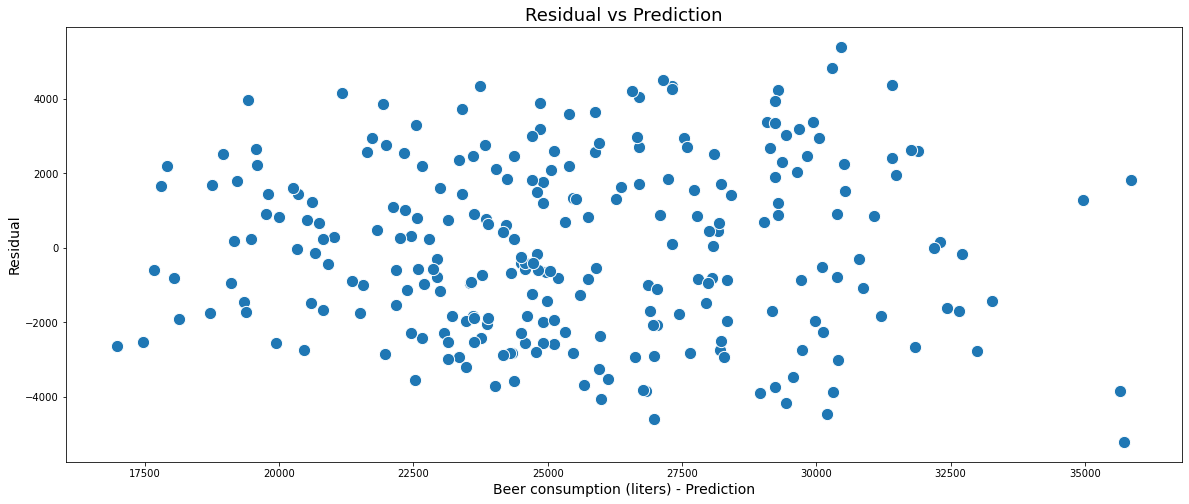

In [68]:
ax = sns.scatterplot(x = y_predicted_train, y=residual, s=150)
ax.figure.set_size_inches(20, 8)
ax.set_title('Residual vs Prediction', fontsize = 18)
ax.set_xlabel('Beer consumption (liters) - Prediction', fontsize=14)
ax.set_ylabel('Residual', fontsize=14)
ax

## Using square residual

<img width='800px' src='data/img/var_u.jpg'>

Fonte: Econometria Básica - 5ª edição - Gujarati e Porter

<AxesSubplot:title={'center':'Residual vs Prediction'}, xlabel='Beer consumption (liters) - Prediction', ylabel='Residual ^ 2'>

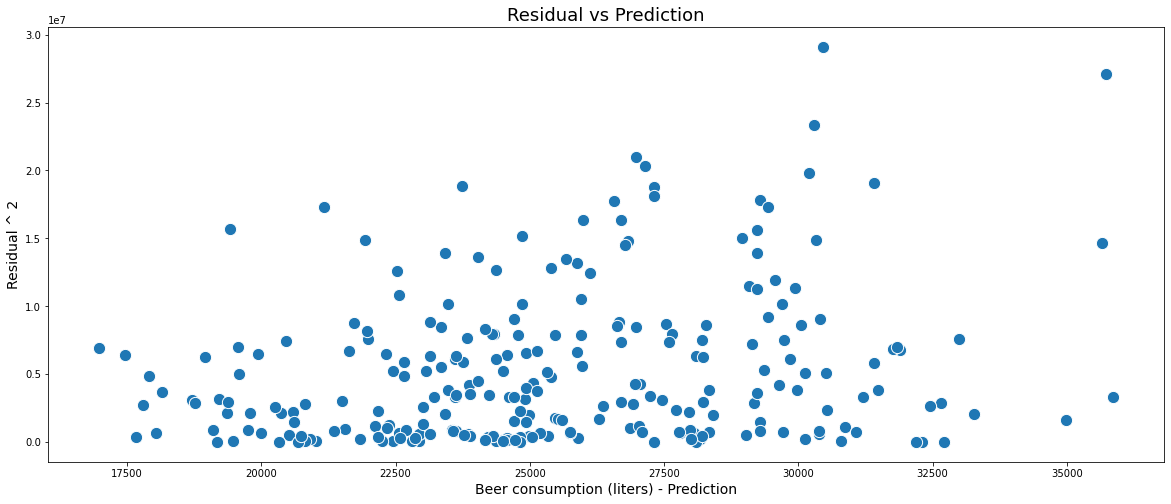

In [69]:
ax = sns.scatterplot(x = y_predicted_train, y=residual ** 2, s=150)
ax.figure.set_size_inches(20, 8)
ax.set_title('Residual vs Prediction', fontsize = 18)
ax.set_xlabel('Beer consumption (liters) - Prediction', fontsize=14)
ax.set_ylabel('Residual ^ 2', fontsize=14)
ax

## Plotting the frequency distribution of residual

C:\Users\PedroFerreira\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Frequency distribution of residual'}, xlabel='Beer consumption (liters) - Prediction', ylabel='Waste ^ 2'>

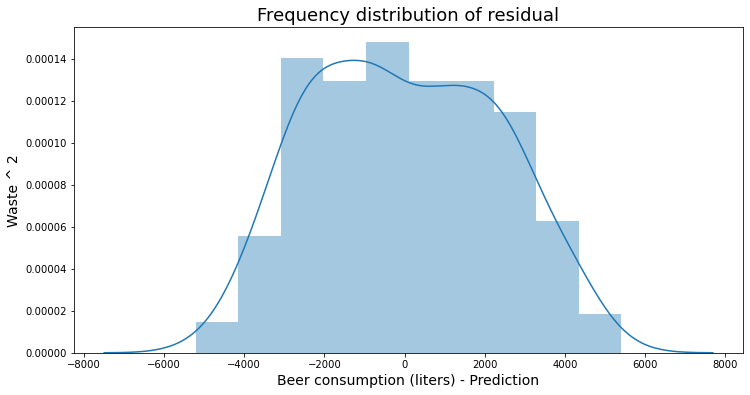

In [72]:
ax = sns.distplot(waste)
ax.figure.set_size_inches(12, 6)
ax.set_title('Frequency distribution of residual', fontsize = 18)
ax.set_xlabel('Beer consumption (liters) - Prediction', fontsize=14)
ax.set_ylabel('Waste ^ 2', fontsize=14)
ax